## Tarea 2 - Máquinas de Aprendizaje
### Integrantes: Gabriel Jara, Daniel San Martín

## 1 Reducción de Dimensionalidad para Clasificación

Como hemos discutido en clases, la reducción de dimensionalidad es extremadamente importante en análisis de datos, no sólo porque nos permite visualizar y por lo tanto explorar los datos a nuestra disposición, si no que también permite reducir el costo computacional de procesarlos, sino porque reduce de modo significativo el riesgo de *overfitting*. En problemas de clasificación, la técnica que hemos discutido en el capítulo 1 (PCA), puede exhibir resultados diametralmente opuestos a aquello que se busca: preservar la información correspondiente a la clase a la que pertenece un ítem.

<img src="img/img1.png">

Para experimentar con este problema, en esta sección trabajaremos con una colección de sonidos fonéticos que deben ser identificados con vocales del inglés británico. Los datos han sido representados en un espacio de $d = 10$ características. Existen 528 datos de entrenamiento y 462 de pruebas, que pueden ser descargados desde el sitio web mantenido por los autores de nuestro texto guía. El mejor desempeño reportado por los autores corresponde a un 56% de *accuracy*, y es alcanzado por un modelo de vecinos más cercanos y una red neuronal artificial de radio basal.

(a) Construya un dataframe con los datos a analizar descargando los datos desde la URL. Determine cuántos registros contiene el conjunto de entrenamiento y cuántos el conjunto de pruebas. Determine además el número promedio de palabras por ítem en cada clase.

In [6]:
import urllib
import pandas as pd

#train_data_url = "http://statweb.stanford.edu/~hastie/ElemStatLearn/datasets/vowel.train"
#test_data_url = "http://statweb.stanford.edu/~hastie/ElemStatLearn/datasets/vowel.test"
#train_data_f = urllib.urlretrieve(train_data_url, "data/train_data.csv")
#test_data_f = urllib.urlretrieve(test_data_url, "data/test_data.csv")
train_df = pd.DataFrame.from_csv('data/train_data.csv',header=0,index_col=0)
test_df = pd.DataFrame.from_csv('data/test_data.csv',header=0,index_col=0)
train_df.head()

,y,x.1,x.2,x.3,x.4,x.5,x.6,x.7,x.8,x.9,x.10
row.names,,,,,,,,,,,
1,1,-3.639,0.418,-0.670,1.779,-0.168,1.627,-0.388,0.529,-0.874,-0.814
2,2,-3.327,0.496,-0.694,1.365,-0.265,1.933,-0.363,0.510,-0.621,-0.488
3,3,-2.120,0.894,-1.576,0.147,-0.707,1.559,-0.579,0.676,-0.809,-0.049
4,4,-2.287,1.809,-1.498,1.012,-1.053,1.060,-0.567,0.235,-0.091,-0.795
5,5,-2.598,1.938,-0.846,1.062,-1.633,0.764,0.394,-0.150,0.277,-0.396


In [7]:
test_df.tail()

,y,x.1,x.2,x.3,x.4,x.5,x.6,x.7,x.8,x.9,x.10
row.names,,,,,,,,,,,
458,7,-3.239,3.083,-1.427,-0.202,-0.282,1.421,0.576,0.068,-0.914,0.147
459,8,-3.753,3.605,-0.899,-0.747,-0.401,1.765,0.620,0.754,-0.835,-0.301
460,9,-3.980,2.459,0.068,0.023,0.237,1.029,-0.189,0.521,-0.773,-0.500
461,10,-4.264,2.925,0.065,0.794,0.323,0.515,-1.282,-0.140,-0.863,-0.390
462,11,-3.291,2.324,-0.679,0.285,0.441,0.557,-0.227,0.115,-1.046,0.697


In [8]:
train_df.describe()

,y,x.1,x.2,x.3,x.4,x.5,x.6,x.7,x.8,x.9,x.10
count,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000
mean,6.000000,-3.166695,1.735343,-0.448002,0.524983,-0.389280,0.584960,0.017477,0.417394,-0.268112,-0.084568
std,3.165277,0.957965,1.160970,0.741363,0.769361,0.722011,0.648547,0.479254,0.595580,0.619584,0.560317
min,1.000000,-5.211000,-1.274000,-2.487000,-1.409000,-2.127000,-0.836000,-1.537000,-1.293000,-1.613000,-1.680000
25%,3.000000,-3.923000,0.916750,-0.945500,-0.083500,-0.930750,0.108500,-0.297000,-0.018250,-0.673750,-0.507000
50%,6.000000,-3.097000,1.733000,-0.502500,0.456500,-0.417000,0.527500,0.040000,0.477000,-0.255000,-0.082500
75%,9.000000,-2.511750,2.403750,0.049250,1.164000,0.115500,1.009750,0.348000,0.861250,0.137500,0.301000
max,11.000000,-0.941000,5.074000,1.413000,2.191000,1.831000,2.327000,1.403000,1.673000,1.309000,1.396000


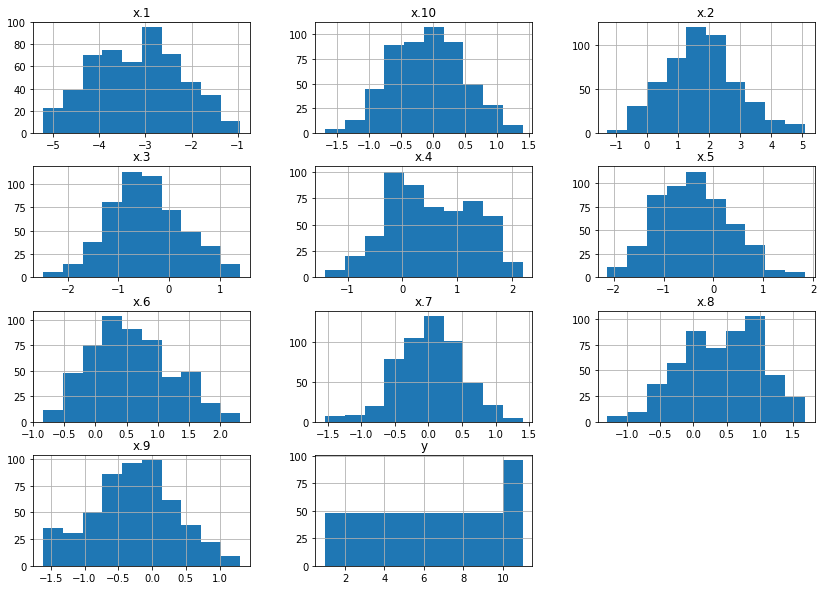

In [15]:
import matplotlib.pyplot as plt

train_df.hist(figsize=(14, 10))
plt.show()

(b) Construya matrices $X$ e $y$ que contengan las características y las etiquetas correspondientes a los datos de entrenamiento y pruebas. Normalice apropiadamente los datos antes de empezar a trabajar.

In [17]:
from sklearn.preprocessing import StandardScaler

X = train_df.loc[:,'x.1':'x.10'].values
y = train_df.loc[:,'y'].values
Scaler = StandardScaler().fit(X)
X_std = Scaler.transform(X)

(c) Utilizando PCA genere una representación en 2 dimensiones de la data original (10 dimensiones) identificando
cada clase con un color distinto (elija una paleta apropiada).

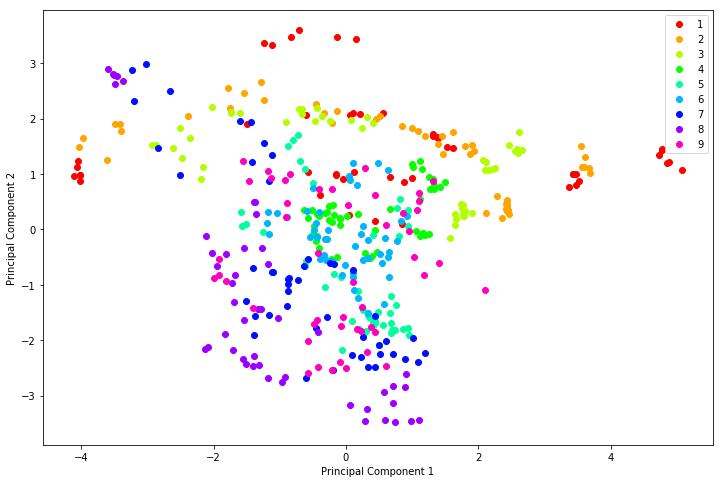

In [18]:
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

sklearn_pca = PCA(n_components=2)
Xred_pca = sklearn_pca.fit_transform(X_std)
cmap = plt.cm.get_cmap('hsv')
mclasses=(1,2,3,4,5,6,7,8,9)
mcolors = [cmap(i) for i in np.linspace(0,1,10)]
plt.figure(figsize=(12, 8))

for lab, col in zip(mclasses,mcolors):
    plt.scatter(Xred_pca[y==lab, 0],Xred_pca[y==lab, 1],label=lab,c=col)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
leg = plt.legend(loc='upper right', fancybox=True)
plt.show()

(d) Utilizando LDA genere una representación en 2 dimensiones de la data original (10 dimensiones) identificando
cada clase con un color distinto (elija una paleta apropiada).

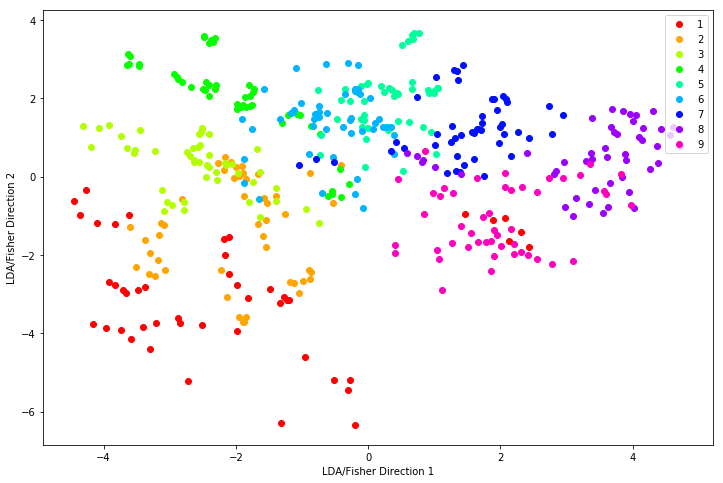

In [19]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

sklearn_lda = LinearDiscriminantAnalysis(n_components=2)
Xred_lda = sklearn_lda.fit_transform(X_std,y)
cmap = plt.cm.get_cmap('hsv')
mclasses=(1,2,3,4,5,6,7,8,9)
mcolors = [cmap(i) for i in np.linspace(0,1,10)]
plt.figure(figsize=(12, 8))

for lab, col in zip(mclasses,mcolors):
    plt.scatter(Xred_lda[y==lab, 0],Xred_lda[y==lab, 1],label=lab, c=col)

plt.xlabel('LDA/Fisher Direction 1')
plt.ylabel('LDA/Fisher Direction 2')
leg = plt.legend(loc='upper right', fancybox=True)
plt.show()

(e) Compare cualitativamente los resultados obtenidos en c y d

(f) Construya un clasificador que determine la clase de un dato x aleatoriamente sin considerar las características
sino que solamente la probabilidad *a-priori* de cada clase. Por ejemplo, si la clase $y = 0$ ocurre el 25% de las veces, su clasificador debe predecir esta clase para un determinado $x$ con probabilidad $0.25$, independiente de los atributos de $x$.

In [30]:
N = float(len(y))
probs = np.zeros(11)

for i in range(11):
    probs[i] = len(y[y==(i+1)])/N

print(probs)

[ 0.09090909  0.09090909  0.09090909  0.09090909  0.09090909  0.09090909
  0.09090909  0.09090909  0.09090909  0.09090909  0.09090909]


(g) Compare el desempeño de LDA, QDA y un modelo de *Vecinos Más Cercanos (k-NN)* $^{†}$ sin reducir dimensionalidad. ¿Qué técnica se comporta mejor sobre el conjunto de entrenamiento? ¿Sobre el conjunto de pruebas? Describa, utilizando un gráfico, el efecto de cambiar el parámetro de $k$ en el tercer modelo.

$^{†}$ Este clasificador busca los $k$ datos de entrenamiento más similares al patrón que se quiere clasificar y predice la clase más popular entre estos.

-----LDA-----
0.683712121212
0.443722943723
-----QDA-----
0.988636363636
0.471861471861
-----KNN-----


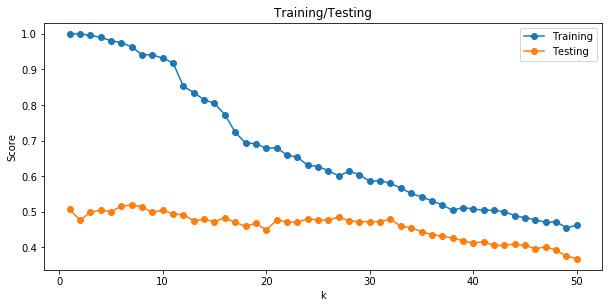

In [34]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

Xtest = test_df.loc[:,'x.1':'x.10'].values
ytest = test_df.loc[:,'y'].values
X_std_test = Scaler.transform(Xtest)
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_std,y)
print "-----LDA-----"
print lda_model.score(X_std,y)
print lda_model.score(X_std_test,ytest)
qda_model = QuadraticDiscriminantAnalysis()
qda_model.fit(X_std,y)
print "-----QDA-----"
print qda_model.score(X_std,y)
print qda_model.score(X_std_test,ytest)
print "-----KNN-----"
knn_scores_training = []
knn_scores_testing = []
k = range(1,51)
for c in k:
    knn_model = KNeighborsClassifier(n_neighbors=c)
    knn_model.fit(X_std,y)
    knn_scores_training.append(knn_model.score(X_std,y))
    knn_scores_testing.append(knn_model.score(X_std_test,ytest))
plt.figure(figsize=(10,10))
plt.subplot(211)
plt.xlabel("k")
plt.ylabel("Score")
plt.title("Training/Testing")
plt.plot(k,knn_scores_training, '-o',k,knn_scores_testing, '-o')
plt.legend(("Training", "Testing"), loc = "upper right")
plt.show()

(h) Utilice PCA para generar una representación de la data en $d'= 1, 2, 3, ... , 10$ dimensiones. Para cada caso entrene un modelo LDA, QDA y de k-NN. Construya un gráfico que muestre cómo evoluciona el error de entrenamiento versus $d'$. Sobreponga a este gráfico el error de pruebas versus $d'$. Concluya.

In [37]:
lda_train = np.zeros(10)
lda_test = np.zeros(10)
qda_train = np.zeros(10)
qda_test = np.zeros(10)
knn_train = np.zeros(10)
knn_test = np.zeros(10)


for d in range(1, 11):
    sklearn_pca = PCA(n_components=d)
    Xtrain_pca = sklearn_pca.fit_transform(X_std)
    Xtest_pca = sklearn_pca.fit_transform(X_std_test)
    
    lda_model = LinearDiscriminantAnalysis()
    lda_model.fit(Xtrain_pca,y)
    lda_train[d-1] = lda_model.score(Xtrain_pca, y)
    lda_test[d-1] = lda_model.score(Xtest_pca, ytest)
    
    qda_model = QuadraticDiscriminantAnalysis()
    qda_model.fit(Xtrain_pca, y)
    qda_train[d-1] = qda_model.score(Xtrain_pca, y)
    qda_test[d-1] = qda_model.score(Xtest_pca, ytest)

    c = 1
    knn_model = KNeighborsClassifier(n_neighbors=c)
    knn_model.fit(Xtrain_pca, y)
    knn_train[d-1] = knn_model.score(Xtrain_pca, y)
    knn_test[d-1] = knn_model.score(Xtest_pca, ytest)

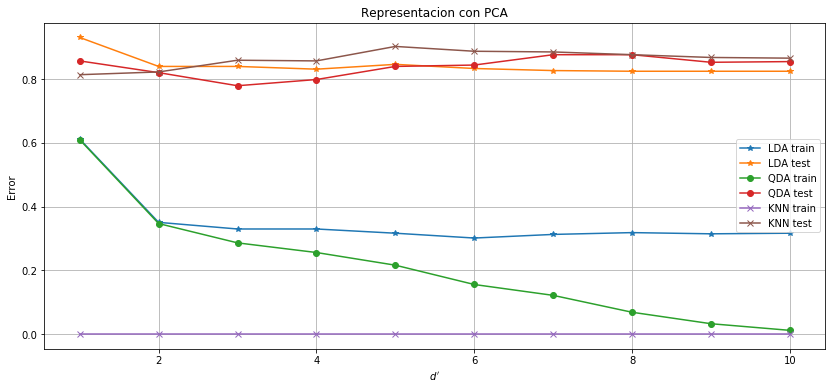

In [63]:
plt.figure(figsize=(14, 6))
D = np.arange(1, 11)
plt.plot(D, 1 - lda_train, marker="*", label="LDA train")
plt.plot(D, 1 - lda_test, marker="*", label="LDA test")
plt.plot(D, 1 - qda_train, marker="o", label="QDA train")
plt.plot(D, 1 - qda_test, marker="o", label="QDA test")
plt.plot(D, 1 - knn_train, marker="x", label="KNN train")
plt.plot(D, 1 - knn_test, marker="x", label="KNN test")
plt.title("Representacion con PCA")
plt.xlabel(r"$d'$")
plt.ylabel("Error")
plt.legend()
plt.grid(True)
plt.show()

(i) Utilice LDA para generar una representación de la data en $d'= 1, 2, 3, ..., 10$ dimensiones. Para cada caso entrene un modelo LDA, QDA y de k-NN. Construya un gráfico que muestre cómo evoluciona el error de entrenamiento versus $d'$. Sobreponga a este gráfico el error de pruebas versus $d'$. Concluya.

In [64]:
lda_train = np.zeros(10)
lda_test = np.zeros(10)
qda_train = np.zeros(10)
qda_test = np.zeros(10)
knn_train = np.zeros(10)
knn_test = np.zeros(10)


for d in range(1, 11):
    sklearn_lda = LinearDiscriminantAnalysis(n_components=d)
    Xtrain_lda = sklearn_lda.fit_transform(X_std, y)
    Xtest_lda = sklearn_lda.fit_transform(X_std_test, ytest)
    
    lda_model = LinearDiscriminantAnalysis()
    lda_model.fit(Xtrain_lda,y)
    lda_train[d-1] = lda_model.score(Xtrain_lda, y)
    lda_test[d-1] = lda_model.score(Xtest_lda, ytest)
    
    qda_model = QuadraticDiscriminantAnalysis()
    qda_model.fit(Xtrain_lda, y)
    qda_train[d-1] = qda_model.score(Xtrain_lda, y)
    qda_test[d-1] = qda_model.score(Xtest_lda, ytest)

    c = 1
    knn_model = KNeighborsClassifier(n_neighbors=c)
    knn_model.fit(Xtrain_lda, y)
    knn_train[d-1] = knn_model.score(Xtrain_lda, y)
    knn_test[d-1] = knn_model.score(Xtest_lda, ytest)

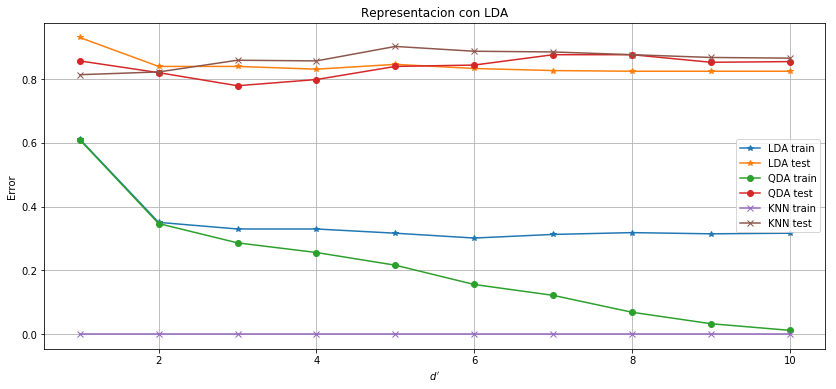

In [65]:
plt.figure(figsize=(14, 6))
D = np.arange(1, 11)
plt.plot(D, 1 - lda_train, marker="*", label="LDA train")
plt.plot(D, 1 - lda_test, marker="*", label="LDA test")
plt.plot(D, 1 - qda_train, marker="o", label="QDA train")
plt.plot(D, 1 - qda_test, marker="o", label="QDA test")
plt.plot(D, 1 - knn_train, marker="x", label="KNN train")
plt.plot(D, 1 - knn_test, marker="x", label="KNN test")
plt.title("Representacion con LDA")
plt.xlabel(r"$d'$")
plt.ylabel("Error")
plt.legend()
plt.grid(True)
plt.show()

## 2 Análisis de Opiniones sobre Películas

El análisis de sentimiento (o minería de opiniones) se refiere al proceso de extraer información acerca de la actitud que una persona (o grupo de ellas) manifiesta, en un determinado medio o formato digital, con respecto a un tópico o contexto de comunicación. Uno de los casos más estudiados corresponde a determinar la *polaridad* de un trozo de texto, es decir, clasificar una determinada evaluación escrita (ó *review*), en que una persona manifiesta una opinión, como *positiva*, *negativa* o *neutral*. La dificultad de este problema radica en el carácter altamente ambiguo e informal del lenguaje que utilizan naturalmente las personas así como el manejo de negaciones, sarcasmo y abreviaciones en una frase.

<img src="img/img2.png">

Los datos que usaremos para esta actividad corresponden a un subconjunto de los datos publicados en *Kaggle*, en el contexto de una competencia organizada por la Universidad de Stanford [?]. Cada registro disponible corresponderá a una opinión sobre una pelpicula, registrada sobre el sitio *Rotten Tomatoes*. Para empezar nos limitaremos a estudiar textos anotados como positivos o negativos, clases que codificaremos como +1 y 0 respectivamente. Para construir un clasificador que determine automáticamente la polaridad de un trozo de texto, vamos a necesitar representar los textos $\{d_i\}^n_{i=1}$ disponibles como vectores de características (features). El tipo de características más utilizado consiste en contar cuántas veces aparecen ciertos términos/palabras en el texto. Para esto, necesitaremos un *vocabulario* que, para esta actividad, construiremos mediante la unión de todas las palabras que observemos en los textos que tenemos a disposición. Para aumentar la eficacia de las características extraídas es conveniente ejecutar algunas técnicas de preprocesamiento básicas como: pasar todo el texto a minúsculas (lower-casing), eliminar signos de puntuación y eliminar palabras sin significado como artículos, pronombres y preposiciones (stop word removal [4]). Otra técnica que suele ser útil para obtener buenas características (features) es la lematización [6], es decir la reducción de todas las palabras a su tronco léxico base. Una técnica similar y más utilizada en la práctica es el *stemming* [5].

(a) Construya un dataframe con los datos a analizar descargando los datos desde la URL local. Determine cuántos registros de cada clase contiene el conjunto de entrenamiento y cuántos el conjunto de pruebas.

In [3]:
import urllib
import pandas as pd

#train_data_url = "http://www.inf.utfsm.cl/~jnancu/stanford-subset/polarity.train"
#test_data_url = "http://www.inf.utfsm.cl/~jnancu/stanford-subset/polarity.dev"
#train_data_f = urllib.urlretrieve(train_data_url, "data/movies_train_data.csv")
#test_data_f = urllib.urlretrieve(test_data_url, "data/movies_test_data.csv")
ftr = open("data/movies_train_data.csv", "r")
fts = open("data/movies_test_data.csv", "r")
rows = [line.split(" ",1) for line in ftr.readlines()]
train_df = pd.DataFrame(rows, columns=['Sentiment','Text'])
train_df['Sentiment'] = pd.to_numeric(train_df['Sentiment'])
rows = [line.split(" ",1) for line in fts.readlines()]
test_df = pd.DataFrame(rows, columns=['Sentiment','Text'])
test_df['Sentiment'] = pd.to_numeric(test_df['Sentiment'])
print train_df.shape
print test_df.shape

(3554, 2)
(3554, 2)


(b) Construya una función, denominada *word_extractor*, que devuelva una lista de las palabras contenidas en un determinado un trozo de texto. Incorpore en su función las operaciones de lower-casing y stemming. Pruebe la función con las frases sugeridas en el código, invente otras similares y comente. Compare con los resultados obtenidos si no se hace stemming.

In [22]:
import re, time
from nltk.corpus import stopwords
from nltk import WordNetLemmatizer, word_tokenize
from nltk.stem.porter import PorterStemmer

def word_extractor(text):
    ps = PorterStemmer()
    commonwords = stopwords.words('english')
    commonwords.remove("not")
    text = re.sub(r'([a-z])\1+', r'\1\1',text)
    words = ""
    wordtokens = [ ps.stem(word.lower()) \
        for word in word_tokenize(text.decode('utf-8', 'ignore')) ]
    
    for word in wordtokens:
        if word not in commonwords:
            words+=" "+word
            
    return words

print word_extractor("I love to eat cake")
print word_extractor("I love eating cake")
print word_extractor("I loved eating the cake")
print word_extractor("I do not love eating cake")
print word_extractor("I don't love eating cake")

 love eat cake
 love eat cake
 love eat cake
 not love eat cake
 n't love eat cake


(c) Construya una función, denominada *word_extractor2*, análoga a la función anterior, pero que lematice las palabras en vez de hacer stemming. Pruebe la función con las frases sugeridas en el código anterior y discuta las diferencias que observa.

In [23]:
def word_extractor2(text):
    wordlemmatizer = WordNetLemmatizer()
    commonwords = stopwords.words('english')
    commonwords.remove("not")
    text = re.sub(r'([a-z])\1+', r'\1\1',text)
    words = ""
    wordtokens = [ wordlemmatizer.lemmatize(word.lower()) \
        for word in word_tokenize(text.decode('utf-8','ignore')) ]
    
    for word in wordtokens:
        if word not in commonwords:
            words+=" "+word
    
    return words

(d) Utilizando la función *CountVectorizer* de la librería *sklearn* y de acuerdo a las directrices mencionadas
en la introducción, genere una representación vectorial del texto de entrenamiento y del conjunto que usaremos para realizar pruebas. Explore el vocabulario utilizado y determine cuáles son las palabras más frecuentes en el conjunto de entrenamiento y pruebas.

In [25]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
texts_train = [word_extractor2(text) for text in train_df.Text]
texts_test = [word_extractor2(text) for text in test_df.Text]
vectorizer = CountVectorizer(ngram_range=(1, 1), binary='False')
vectorizer.fit(np.asarray(texts_train))
features_train = vectorizer.transform(texts_train)
features_test = vectorizer.transform(texts_test)
labels_train = np.asarray((train_df.Sentiment.astype(float)+1)/2.0)
labels_test = np.asarray((test_df.Sentiment.astype(float)+1)/2.0)
vocab = vectorizer.get_feature_names()
dist=list(np.array(features_train.sum(axis=0)).reshape(-1,))

for tag, count in zip(vocab, dist):
    print count, tag

6 10
4 100
2 101
1 105
2 10th
4 11
2 110
1 11th
1 12
2 13
1 13th
1 14
1 140
1 146
3 15
1 16
1 163
2 170
1 18th
4 19
2 1915
1 1934
1 1938
1 1940s
2 1950
1 1950s
1 1954
1 1955
1 1958
1 1959
2 1960s
1 1967
1 1972
3 1975
1 1978
1 1979
2 1980
1 1991
1 1992
2 1995
3 19th
4 20
2 2000
7 2002
4 20th
2 21st
1 22
1 24
2 25
1 25s
2 30
1 300
2 3000
1 30s
1 37
1 3d
5 40
1 400
1 401
1 40s
1 451
1 48
1 49
4 4ever
3 50
2 51
1 53
1 5ths
2 60s
1 65
1 65th
4 70s
1 71
1 77
1 78
1 79
4 80
1 800
3 80s
2 84
2 85
1 88
1 8th
13 90
1 90s
1 93
1 94
2 95
1 96
1 97
2 99
1 aaliyah
2 abandon
1 abandono
1 abbass
1 abbreviated
1 abc
2 abel
1 abhorrent
1 abiding
11 ability
6 able
3 ably
1 aboul
3 above
1 abrahams
1 abrams
1 abrasive
2 abroad
1 abruptly
2 absolute
7 absolutely
1 absorb
1 absorbed
10 absorbing
1 absorption
5 abstract
2 absurd
3 absurdist
4 absurdity
1 absurdly
1 aburrido
4 abuse
1 abysmally
1 acabamos
1 academic
2 academy
7 accent
1 accentuating
2 accept
1 accepting
10 accessible
2 accident
1 accidental
1

1 bui
10 build
2 building
5 built
1 bull
3 bullet
1 bullfighter
5 bullock
1 bullwinkle
1 bumbling
1 bump
1 bumper
5 bunch
1 bundy
2 buoyant
1 burdette
3 burger
3 buried
2 burke
5 burn
1 burnt
2 burr
2 burst
1 burstein
1 bursting
2 bus
1 buscemi
1 bush
8 business
2 bust
1 busting
1 bustling
3 busy
1 butler
1 butt
1 butterfingered
1 butterworth
2 button
2 buuel
6 buy
1 buyers
1 buying
1 buzz
8 by
1 byatt
1 bygone
2 byler
1 bypass
1 byron
41 ca
1 cabin
3 cable
1 cackle
1 cacophony
1 cacoyannis
1 cada
1 caddyshack
2 caesar
1 caf
1 cafe
1 caffeinated
5 cage
1 cahill
7 caine
1 cal
1 calamity
1 calcified
4 calculated
3 calculating
2 caliber
2 calibrated
1 california
17 call
3 callar
7 called
2 calling
1 callow
1 calvin
1 camaraderie
1 camareras
3 came
4 cameo
15 camera
1 cameron
3 camouflage
8 camp
1 campanella
1 campfire
1 campion
1 campus
1 campy
2 canada
1 canadian
2 cancer
1 candidly
1 candle
3 candy
3 canned
2 cannes
1 canning
3 canny
1 canon
2 cantet
4 capable
1 capably
2 capacity
7 cap

3 directs
1 diretor
1 dirgelike
3 dirty
1 disabled
1 disaffected
1 disagreeable
1 disappear
4 disappointed
3 disappointing
2 disappointingly
5 disappointment
1 disappoints
1 disarmingly
3 disaster
6 disbelief
1 discard
2 discernible
1 discipline
1 discloses
1 disclosure
1 disco
1 disconnected
1 discontented
1 discordant
1 discount
1 discourages
3 discover
5 discovery
1 discursive
1 discus
3 discussion
1 disdain
1 disgrace
1 disgracefully
6 disguise
2 disguised
1 disguising
1 disgust
2 disgusted
2 disgusting
2 dish
2 dishonest
1 dishonesty
1 disintegrates
2 disintegrating
3 disjointed
1 dislikable
1 dismal
1 dismally
1 dismantle
1 dismay
1 dismember
2 dismiss
2 dismissed
14 disney
1 disparate
1 dispassionate
1 dispatching
4 display
2 disposable
1 disposition
1 dispossessed
1 disquieting
1 disquisition
1 disreputable
1 disservice
1 dissident
1 dissing
1 dissipated
1 dissolution
8 distance
1 distanced
1 distancing
1 distant
1 distasteful
1 distill
1 distilled
2 distinct
6 distinctive
1 di

2 hammer
2 hampered
12 hand
11 handed
2 handedness
6 handful
1 handgun
1 handheld
1 handicap
1 handily
1 handiwork
5 handle
2 handled
1 handling
1 hands
1 handsome
6 haneke
1 hang
1 hanging
1 hank
1 hanna
1 hanussen
4 haphazard
1 hapless
3 happen
3 happened
3 happening
8 happens
3 happily
2 happiness
9 happy
1 harbor
46 hard
1 hardened
2 harder
1 hardest
9 hardly
1 hardman
2 hardware
1 hardy
1 hare
2 harm
7 harmless
1 harmon
1 harmoniously
4 harris
4 harrowing
5 harry
3 harsh
1 harshness
2 hart
3 hartley
7 harvard
1 harvest
1 harvey
1 has
1 hashiguchi
1 hastily
4 hat
8 hate
2 hated
2 hatfield
1 hatosy
2 hatred
3 haunted
8 haunting
1 haute
1 have
1 hawaiian
4 hawk
3 hawke
3 hawn
5 haynes
23 head
1 headache
1 headline
1 heads
2 heady
1 heal
2 health
4 hear
3 heard
2 hearst
52 heart
2 heartache
1 heartbeat
1 heartbreak
3 heartbreaking
2 heartbreakingly
7 hearted
1 heartening
8 heartfelt
1 heartily
1 heartland
2 heartstrings
6 heartwarming
4 heat
7 heaven
2 heavily
1 heaviness
24 heavy
1 h

2 loser
8 loses
1 losin
8 loss
11 lost
52 lot
14 loud
1 louis
1 louise
1 louiso
3 lousy
2 lovable
64 love
4 loved
10 lovely
4 lover
1 lovers
6 loving
1 lovingly
21 low
2 lowbrow
3 loyal
1 ltimo
1 ltimos
3 lucas
2 luckiest
3 lucky
3 ludicrous
1 lugosi
1 lukewarm
1 lull
1 lullaby
1 lulling
2 lumbering
1 luminous
2 lump
1 lumpen
1 lunacy
1 lunar
1 lunatic
1 lunch
1 lunchers
1 lurch
1 lured
2 luridly
1 lurking
1 luscious
4 lush
1 lushness
1 luster
1 lustrous
1 luther
1 luv
1 lying
1 lynching
2 lyric
3 lyrical
3 lyricism
2 macabre
1 macdowell
1 machination
8 machine
1 machinery
3 machismo
1 macnaughton
2 macy
5 mad
2 maddening
71 made
5 madness
5 madonna
1 maelstrom
1 maggot
7 magic
1 magical
1 magimel
1 magnetic
3 magnificent
1 magnifique
1 magnolia
1 mai
4 maid
1 maiden
1 maik
7 main
1 mainland
5 mainly
4 mainstream
3 maintain
2 maintaining
5 maintains
1 maintenance
1 mais
1 majesty
1 majid
3 majidi
6 major
1 majority
183 make
8 maker
2 makhmalbaf
1 makin
29 making
1 malarkey
1 malcolm
4 

1 perseverance
1 persistence
1 persistent
1 persnickety
10 person
8 persona
1 personajes
12 personal
4 personality
1 personally
2 personified
6 perspective
1 persuasion
2 persuasive
3 pertinent
2 pervasive
2 perverse
1 perversity
1 pesky
1 pessimist
2 pessimistic
1 pete
6 peter
1 petite
1 petri
1 petty
2 pg
1 phantom
3 phenomenal
1 philandering
3 philip
2 phillip
1 philosopher
3 philosophical
4 philosophy
1 phoenix
1 phonce
4 phone
1 phoney
1 phoniness
1 photo
2 photograph
1 photographic
4 photography
2 phrase
2 physic
3 physical
2 physically
1 physique
6 pianist
4 piano
9 pic
4 piccoli
3 pick
1 picky
1 picnic
46 picture
5 pie
35 piece
1 piesiewicz
2 piffle
7 pile
1 pileup
1 pilot
1 pimental
1 pin
1 pincel
1 pine
1 pinned
4 pinocchio
2 pinochet
1 pint
1 pipe
1 piper
1 piquant
1 pirate
1 pissed
1 pistoled
1 pit
2 pitch
1 pitched
2 pitfall
1 pitiful
2 pity
1 pitying
2 pivotal
1 pixar
1 pizazz
1 pizza
25 place
1 placement
1 placid
2 placing
8 plain
1 plainly
1 plainness
1 plan
4 planet
1 

1 simplest
5 simplicity
6 simplistic
25 simply
2 simpson
1 simulation
4 simultaneously
3 sin
1 sinai
32 since
7 sincere
2 sing
1 singer
3 singing
17 single
1 sings
1 singular
1 sinister
3 sink
1 sinner
1 siren
1 sirk
4 sister
2 sisterhood
12 sit
2 sitcom
1 sitcomishly
1 sits
7 sitting
17 situation
1 six
1 sixed
1 sixth
1 sixties
1 size
4 sized
2 sizzle
2 skate
1 skateboard
1 skateboarder
1 skating
1 skeleton
1 skeptic
4 sketch
1 sketchbook
1 sketched
2 sketchy
1 skewed
1 skewering
1 skid
1 skilfully
9 skill
1 skillful
1 skillfully
1 skim
1 skimpy
9 skin
1 skinner
3 skip
1 skit
1 skullduggery
1 skunk
2 sky
1 sl2
1 slack
1 slackers
1 slain
1 slam
1 slanted
3 slap
1 slapdash
1 slapping
7 slapstick
2 slash
5 slasher
1 slavishly
1 slc
1 sleaze
1 sleazy
2 sledgehammer
1 sleek
4 sleep
2 sleight
1 slender
4 slice
5 slick
1 slickly
2 slickness
2 slide
1 sliding
3 slight
5 slightly
2 slim
1 slimed
1 sling
4 slip
2 slippery
1 slipshod
1 sliver
2 slo
1 slob
1 slog
1 slogan
1 slope
1 sloppiness
4 s

1 twirling
12 twist
2 twisted
2 twisting
1 twisty
2 twitchy
62 two
6 type
7 typical
1 typically
1 typifies
1 ugliness
14 ugly
1 uh
1 uk
8 ultimate
44 ultimately
1 ultra
1 ultraviolent
4 um
1 uma
2 un
5 una
1 unabashed
4 unabashedly
3 unable
1 unaccountable
1 unamusing
1 unanswered
1 unapologetic
2 unapologetically
2 unashamedly
2 unassuming
1 unattractive
1 unaware
1 unbalanced
3 unbearable
1 unbearably
2 unbelievably
1 unblinking
1 unbridled
3 uncanny
1 unceasing
2 uncertain
1 uncertainty
1 uncinematic
1 unclassifiably
1 uncle
1 unclean
1 unclear
1 uncluttered
1 uncomfortable
4 uncomfortably
2 uncommonly
1 uncompelling
4 uncompromising
1 unconnected
1 uncontrolled
1 unconventionally
5 unconvincing
1 uncoordinated
1 undead
1 undemanding
1 undeniable
2 undeniably
2 under
1 underappreciated
1 underbelly
1 undercover
2 undercurrent
3 undercut
1 underdog
1 underdramatized
1 underestimate
1 underestimated
1 undergraduate
4 underlying
1 undermine
1 undermined
2 undermining
2 underneath
1 und

(e) Construya una función que evalúe el desempeño obtenido por un clasificador genérico en el conjunto de entrenamiento y en el conjunto de pruebas. Utilice y explique las métricas que calcula la función *classification_report* de la librería *sklearn*.

In [26]:
from sklearn.metrics import classification_report

def score_the_model(model,x,y,xt,yt,text):
    acc_tr = model.score(x,y)
    acc_test = model.score(xt[:-1],yt[:-1])
    print "Training Accuracy %s: %f"%(text,acc_tr)
    print "Test Accuracy %s: %f"%(text,acc_test)
    print "Detailed Analysis Testing Results ..."
    print(classification_report(yt, model.predict(xt), target_names=['+','-']))

(f) Construya una función que entrene/ajuste un clasificador *Bayesiano Ingenuo (Binario)* (las características
no nulas serán tratadas como 1) y mida el error de predicción obtenido sobre los datos de entrenamiento y pruebas. Utilice esta función con las características extraídas en el punto (d). Mida el efecto de filtrar *stopwords* y de eliminar este paso de pre-procesamiento típico. Determine además, qué representación obtiene un mejor resultado: si aquella obtenida vía lematización o aquella obtenida vía stemming. Finalmente, tome un subconjunto aleatorio de los textos de prueba y analice las predicciones del modelo (explore las predicciones, así como las probabilidades que el clasificador asigna a cada clase).

In [27]:
from sklearn.naive_bayes import BernoulliNB
import random
def do_NAIVE_BAYES(x,y,xt,yt):
    model = BernoulliNB()
    model = model.fit(x, y)
    score_the_model(model,x,y,xt,yt,"BernoulliNB")
    return model

model=do_NAIVE_BAYES(features_train,labels_train,features_test,labels_test)
test_pred = model.predict_proba(features_test)
spl = random.sample(xrange(len(test_pred)), 15)
for text, sentiment in zip(test_df.Text[spl], test_pred[spl]):
    print sentiment, text

Training Accuracy BernoulliNB: 0.958920
Test Accuracy BernoulliNB: 0.738249
Detailed Analysis Testing Results ...
             precision    recall  f1-score   support

          +       0.75      0.73      0.74      1803
          -       0.73      0.75      0.74      1751

avg / total       0.74      0.74      0.74      3554

[ 0.87321944  0.12678056] such a fine idea for a film , and such a stultifying , lifeless execution .

[ 0.21836018  0.78163982] this is simply the most fun you'll ever have with a documentary !

[ 0.13550865  0.86449135] one of the best examples of how to treat a subject , you're not fully aware is being examined , much like a photo of yourself you didn't know was being taken .

[ 0.10492176  0.89507824] gangs of new york is an unapologetic mess , whose only saving grace is that it ends by blowing just about everything up .

[ 0.05524006  0.94475994] this bracingly truthful antidote to hollywood teenage movies that slather clearasil over the blemishes of youth c

(g) Construya una función que entrene/ajuste una *Máquina de Vectores de Soporte (SVM) Lineal* y mida el error de predicci´on obtenido sobre los datos de entrenamiento y pruebas. Incluya en su función la exploración de diferentes valores del parámetro de regularización $C$. Discuta el significado y efecto esperado de este parámetro. Utilice la función construida con los atributos extraídos en el punto (d). Mida el efecto de filtrar *stopwords* y de eliminar este paso de pre-procesamiento típico. Determine además, qué representaciṕn obtiene un mejor resultado: si aquella obtenida vía lematización o aquella obtenida vía stemming. Finalmente, tome un subconjunto aleatorio de los textos de prueba y analice las predicciones del modelo (explore las predicciones, así como las probabilidades que el clasificador asigna a cada clase).

In [28]:
from sklearn.svm import LinearSVC

def do_SVM(x,y,xt,yt):
    Cs = [0.01,0.1,10,100,1000]
    for C in Cs:
        print "C Value: %f"%C
        model = LinearSVC(C=C)
        model = model.fit(x, y)
        score_the_model(model,x,y,xt,yt,"SVM")
        
do_SVM(features_train,labels_train,features_test,labels_test)

C Value: 0.010000
Training Accuracy SVM: 0.886044
Test Accuracy SVM: 0.716296
Detailed Analysis Testing Results ...
             precision    recall  f1-score   support

          +       0.72      0.72      0.72      1803
          -       0.71      0.71      0.71      1751

avg / total       0.72      0.72      0.72      3554

C Value: 0.100000
Training Accuracy SVM: 0.989871
Test Accuracy SVM: 0.724740
Detailed Analysis Testing Results ...
             precision    recall  f1-score   support

          +       0.73      0.72      0.73      1803
          -       0.72      0.73      0.72      1751

avg / total       0.72      0.72      0.72      3554

C Value: 10.000000
Training Accuracy SVM: 1.000000
Test Accuracy SVM: 0.705038
Detailed Analysis Testing Results ...
             precision    recall  f1-score   support

          +       0.72      0.69      0.70      1803
          -       0.69      0.72      0.71      1751

avg / total       0.71      0.71      0.71      3554

C Valu

## 3 Fraude en transacciones bancarias

El mundo está más globalizado, servicios que antes solo se podían hacer de manera presencial hoy en día están disponibles de forma electrónica, el más claro ejemplo de esto son las transacciones bancarias. La ventaja de este cambio es que cualquier persona en el mundo puede enviar dinero de un lado a otro en cosa de segundos, por consecuencia, la cantidad de transacciones aumentó mucho. La desventaja es que es más fácil cometer fraudes, debido a que las únicas barreras de protección que tenemos ante estas malas prácticas son códigos de seguridad (Clave secreta, matriz de números, etc.) que si caen en manos de gente deshonesta lo más probable es que se comenta algún tipo fraude. 

En esta sección utilizaremos un dataset de *Kaggle* [3] que contiene transacciones bancarias, el desafío está en que sus clases están desbalanceadas, por lo tanto, utilizaremos 3 técnicas para hacer frente a este problema. El *dataset* contiene transacciones hechas por tarjetas de créditos europeas durante un periodo de 2 díaas, donde 492 de 284807 fueron fraudulentas. Cada dato tiene como atributo 28 componentes principales obtenidos por PCA (Esto se hace para enmascarar datos sensibles), una variable tiempo y el monto de la transacción.

(a) Descargue y cargue el archivo, genere un gráfico que compare la cantidad de elementos que hay por clase.

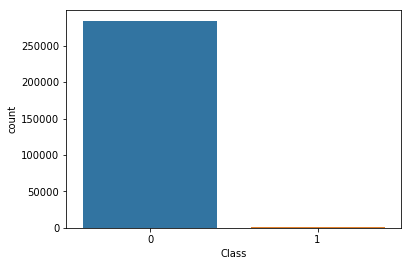

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

dt = pd.read_csv("data/creditcard.csv",header = 0)
sns.countplot("Class",data=dt)
plt.show()

(b) Estandarice el monto de la transacción. ¿Por qué solo estandarizamos un atributo?

In [38]:
from sklearn.preprocessing import StandardScaler

dt["nAmount"] = StandardScaler().fit_transform(dt['Amount'].values.reshape(-1, 1))
dt.drop(["Time","Amount"],axis=1,inplace=True)
dt.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,nAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


(c) Defina una función que reciba como *input* un modelo, los datos de entrenamiento y datos de testeo. Esta función deberá mostrar luego de generar el modelo y haber probado la data de testing una matriz de confusión, junto a sus respectivas métricas. Deberá además mostrar una curva ROC junto al valor del área bajo la curva de esta. Finalmente, responda las siguientes preguntas ¿Qué es una matriz de confusión? ¿Que métricas se pueden calcular de esta y cuales nos serán útiles en este experimento? ¿Que es una curva ROC y qué relación tiene con la matriz de confusión?

In [39]:
def model(model,features_train,features_test,labels_train,labels_test):
    clf = model
    clf.fit(features_train,labels_train.values.ravel())
    pred=clf.predict(features_test)
    cnf_matrix=confusion_matrix(labels_test,pred)
    print "The recall for this model is: %f"%(float(cnf_matrix[1,1])/(cnf_matrix[1,1]+
    cnf_matrix[1,0]))
    fig= plt.figure(figsize=(6,3))
    print "TP: %d"%cnf_matrix[1,1,]
    print "TN: %d"%cnf_matrix[0,0]
    print "FP: %d"%cnf_matrix[0,1]
    print "FN: %d"%cnf_matrix[1,0]
    sns.heatmap(cnf_matrix,cmap="coolwarm_r",annot=True,linewidths=0.5)
    plt.title("Confusion_matrix")
    plt.xlabel("Predicted_class")
    plt.ylabel("Real class")
    plt.show()
    print "\n----------Classification Report------------------------------------"
    print classification_report(labels_test,pred)
    ''' You have to complete this function, ROC Curve is missing'''

(d) Defina una función que genere un *Training* y *Testing Set* de un *Dataset* cualquiera. Indique que está
haciendo la función.

In [40]:
from sklearn.model_selection import train_test_split
def data_prepration(x):
    x_features= x.iloc[:,x.columns != "Class"]
    x_labels=x.iloc[:,x.columns=="Class"]
    x_train,x_test,y_train,y_test=train_test_split(x_features,x_labels,test_size=0.3)
    print "Length of training data: %d"%len(x_train)
    print "Length of test data: %d"%len(x_test)
    return(x_train,x_test,y_train,y_test)

(e) Defina una función que realice *Undersample* [8] . ¿Explique en que consiste esta técnica?

In [41]:
def undersample(data,times):
    fraud_indices= np.array(data[data.Class==1].index)
    normal_indices = np.array(data[data.Class==0].index)
    Count_Normal_transacation = len(data[data["Class"]==0])
    Count_Fraud_transacation = len(data[data["Class"]==1])
    Normal_indices_undersample = np.array(np.random.choice(normal_indices,
    (times*Count_Fraud_transacation),replace=False))
    undersample_data= np.concatenate([fraud_indices,Normal_indices_undersample])
    undersample_data = data.iloc[undersample_data,:]
    normal = (float(len(undersample_data[undersample_data.Class==0]))/len(undersample_data["Class"]))
    print "The normal transacation proportion is : %f"%normal
    fraud = (float(len(undersample_data[undersample_data.Class==1]))/len(undersample_data["Class"]))
    print "The fraud transacation proportion is : %f"%fraud
    return(undersample_data)

(f) Genere un modelo de *Logistic Regression* y otro a su elección utilizando *UnderSample* [8]. Concluya a partir de los resultados

Length of training data: 199364
Length of test data: 85443
The undersample data for 1 proportion

The normal transacation proportion is : 0.500000
The fraud transacation proportion is : 0.500000

----------------------Validation Set------------------------

The model classification for 1 proportion

Length of training data: 504
Length of test data: 216
The recall for this model is: 0.888889
TP: 96
TN: 103
FP: 5
FN: 12


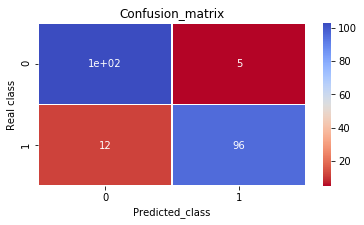


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       0.90      0.95      0.92       108
          1       0.95      0.89      0.92       108

avg / total       0.92      0.92      0.92       216

--------------------------Testing Set---------------------------
The recall for this model is: 0.901515
TP: 119
TN: 81323
FP: 3988
FN: 13


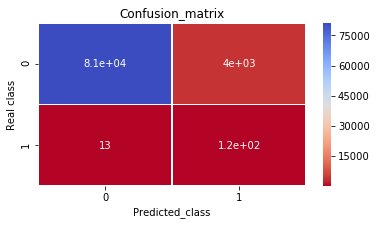


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       1.00      0.95      0.98     85311
          1       0.03      0.90      0.06       132

avg / total       1.00      0.95      0.97     85443

---------------------------------------------------------------
The undersample data for 2 proportion

The normal transacation proportion is : 0.666667
The fraud transacation proportion is : 0.333333

----------------------Validation Set------------------------

The model classification for 2 proportion

Length of training data: 756
Length of test data: 324
The recall for this model is: 0.920354
TP: 104
TN: 203
FP: 8
FN: 9


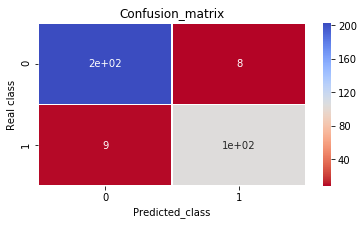


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       0.96      0.96      0.96       211
          1       0.93      0.92      0.92       113

avg / total       0.95      0.95      0.95       324

--------------------------Testing Set---------------------------
The recall for this model is: 0.916667
TP: 121
TN: 82505
FP: 2806
FN: 11


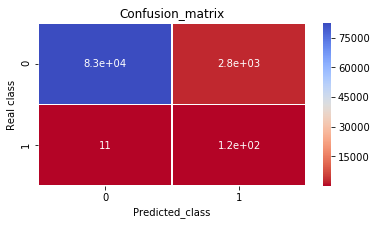


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       1.00      0.97      0.98     85311
          1       0.04      0.92      0.08       132

avg / total       1.00      0.97      0.98     85443

---------------------------------------------------------------
The undersample data for 3 proportion

The normal transacation proportion is : 0.750000
The fraud transacation proportion is : 0.250000

----------------------Validation Set------------------------

The model classification for 3 proportion

Length of training data: 1008
Length of test data: 432
The recall for this model is: 0.890909
TP: 98
TN: 311
FP: 11
FN: 12


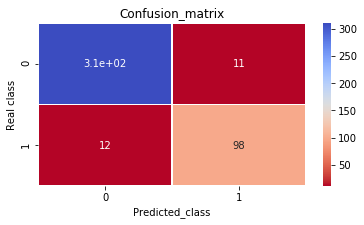


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       0.96      0.97      0.96       322
          1       0.90      0.89      0.89       110

avg / total       0.95      0.95      0.95       432

--------------------------Testing Set---------------------------
The recall for this model is: 0.863636
TP: 114
TN: 83844
FP: 1467
FN: 18


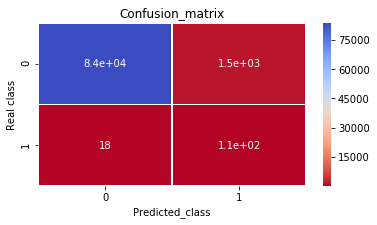


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       1.00      0.98      0.99     85311
          1       0.07      0.86      0.13       132

avg / total       1.00      0.98      0.99     85443

---------------------------------------------------------------


In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,recall_score,precision_recall_curve,auc,roc_curve, roc_auc_score,classification_report
x_tr,x_ts,y_tr,y_ts = data_prepration(dt)
x_tr["Class"] = y_tr["Class"]
x_tr = x_tr.reset_index(drop=True)
for i in range(1,4):
    print "The undersample data for " + str(i) + " proportion\n"
    Undersample_data = undersample(x_tr,i)
    print "\n----------------------Validation Set------------------------"
    print "\nThe model classification for " + str(i) + " proportion\n"
    under_x,under_xt,under_yx,under_yxt=data_prepration(Undersample_data)
    clf=LogisticRegression()
    model(clf,under_x,under_xt,under_yx,under_yxt)
    print "--------------------------Testing Set---------------------------"
    model(clf,under_x,x_ts,under_yx,y_ts)
    print "---------------------------------------------------------------"

(g) Vuelva a realizar los puntos (e) y (f), esta vez utilizando *OverSampling* [7] y SMOTE [8] (Hint: Para
SMOTE usted puede apoyarse de la libreria imblearn)

In [43]:
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
os_data_X,os_data_y=os.fit_sample(x_tr,y_tr)

/home/dsanmartin/anaconda3/envs/py27/lib/python2.7/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Referencias

* [1] Hastie, T.; Tibshirani, R., Friedman, J. (2009), The Elements of Statistical Learning, Second Edition. Springer New York Inc.
* [2] Joshi, M., Das, D., Gimpel, K., Smith, N. A. (2010). Movie reviews and revenues: An experiment in text regression. In the 2010 Annual Conference of the North American Chapter of the Association for Computational Linguistics (pp. 293-296). Association for Computational Linguistics.
* [3] https://www.kaggle.com/dalpozz/creditcardfraud
* [4] https://en.wikipedia.org/wiki/Stop words
* [5] https://en.wikipedia.org/wiki/Stemming
* [6] https://en.wikipedia.org/wiki/Lemmatisation
* [7] https://en.wikipedia.org/wiki/Oversampling and undersampling in data analysis
* [8] https://www.irjet.net/archives/V4/i8/IRJET-V4I857.pd